In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import datetime

In [4]:
import time

In [5]:
from scipy.io import loadmat

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
from sklearn.metrics import mean_squared_error

In [8]:
from sklearn import metrics

In [9]:
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
from sklearn.model_selection import (train_test_split, StratifiedKFold)

In [13]:
from sklearn.pipeline import Pipeline

In [14]:
from sklearn.compose import ColumnTransformer

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor

In [17]:
from sklearn.svm import SVR

In [18]:
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor

In [19]:
from sklearn.linear_model import LinearRegression, SGDRegressor

In [20]:
from sklearn.neighbors import KNeighborsRegressor

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [22]:
import tensorflow as tf

In [23]:
from tensorflow.keras.models import Sequential

In [24]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, LSTM

In [25]:
from tensorflow.keras.optimizers import Adam

In [26]:
def load_data(battery):
    mat = loadmat('Dataset/' + battery + '.mat')
    print('Total data in dataset: ', len(mat[battery][0, 0]['cycle'][0]))
    counter = 0
    dataset = []
    capacity_data = []
    for i in range(len(mat[battery][0, 0]['cycle'][0])):
        row = mat[battery][0, 0]['cycle'][0, i]
        if row['type'][0] == 'discharge':
            ambient_temperature = row['ambient_temperature'][0][0]
            date_time = datetime.datetime(int(row['time'][0][0]),
                               int(row['time'][0][1]),
                               int(row['time'][0][2]),
                               int(row['time'][0][3]),
                               int(row['time'][0][4])) + datetime.timedelta(seconds=int(row['time'][0][5]))
            data = row['data']
            capacity = data[0][0]['Capacity'][0][0]
            for j in range(len(data[0][0]['Voltage_measured'][0])):
                voltage_measured = data[0][0]['Voltage_measured'][0][j]
                current_measured = data[0][0]['Current_measured'][0][j]
                temperature_measured = data[0][0]['Temperature_measured'][0][j]
                current_load = data[0][0]['Current_load'][0][j]
                voltage_load = data[0][0]['Voltage_load'][0][j]
                time = data[0][0]['Time'][0][j]
                dataset.append([counter + 1, ambient_temperature, date_time, capacity,
                        voltage_measured, current_measured,
                        temperature_measured, current_load,
                        voltage_load, time])
            capacity_data.append([counter + 1, ambient_temperature, date_time, capacity])
            counter = counter + 1
    print(dataset[0])
    return [pd.DataFrame(data=dataset,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity', 'voltage_measured',
                                'current_measured', 'temperature_measured',
                                'current_load', 'voltage_load', 'time']),
          pd.DataFrame(data=capacity_data,
                       columns=['cycle', 'ambient_temperature', 'datetime','capacity'])]

In [27]:
dataset, capacity = load_data('B0007')
pd.set_option('display.max_columns', 10)

Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 1.89105229539079, 4.199359521791473, -0.0018658918833680202, 23.93704394613529, -0.0004, 0.0, 0.0]


In [28]:
dataset.head()

,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
0,1,24,2008-04-02 15:25:41,1.891052,4.199360,-0.001866,23.937044,-0.0004,0.000,0.000
1,1,24,2008-04-02 15:25:41,1.891052,4.199497,-0.002139,23.924074,-0.0004,4.215,16.781
2,1,24,2008-04-02 15:25:41,1.891052,3.985606,-1.988778,24.004257,-2.0000,3.003,35.703
3,1,24,2008-04-02 15:25:41,1.891052,3.963247,-1.992558,24.162868,-2.0000,2.987,53.781
4,1,24,2008-04-02 15:25:41,1.891052,3.946647,-1.988491,24.346368,-2.0000,2.972,71.922


In [29]:
dataset.sample(10)

,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
11059,46,24,2008-04-26 05:57:35,1.785885,3.507309,-1.988643,31.927830,2.0,2.570,1977.140
37965,128,24,2008-05-18 08:00:50,1.492414,3.607869,-1.991119,30.084601,2.0,2.674,890.609
17202,64,24,2008-05-02 19:07:48,1.703652,3.691871,-1.991579,29.776244,2.0,2.753,806.375
12878,51,24,2008-04-30 02:43:55,1.790448,3.456560,-1.989197,34.521914,2.0,2.521,2492.860
26401,91,24,2008-05-09 20:28:09,1.625994,3.265980,-1.991094,37.857234,2.0,2.330,2717.547
41123,138,24,2008-05-20 15:57:27,1.472248,3.448527,-1.988826,33.755523,2.0,2.512,1659.015
15629,59,24,2008-05-01 18:11:10,1.739646,3.478513,-1.991389,34.037748,2.0,2.539,2164.546
50229,168,24,2008-05-27 20:45:42,1.432455,3.271987,-1.988641,36.823734,2.0,2.334,2288.687
18923,69,24,2008-05-03 18:58:13,1.677927,3.635119,-1.990432,30.078658,2.0,2.697,1012.437
10439,44,24,2008-04-25 20:03:55,1.806264,3.410969,-1.988021,34.778469,2.0,2.475,2783.312


In [30]:
dataset.isna().sum()

cycle                   0
ambient_temperature     0
datetime                0
capacity                0
voltage_measured        0
current_measured        0
temperature_measured    0
current_load            0
voltage_load            0
time                    0
dtype: int64

In [31]:
dataset.describe()

,cycle,ambient_temperature,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
count,50285.000000,50285.0,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000
mean,88.125942,24.0,1.632911,3.516153,-1.910982,32.374078,1.471671,2.499169,1546.208924
std,45.699687,0.0,0.152751,0.268665,0.387120,4.004486,1.294697,0.550780,906.640295
min,1.000000,24.0,1.400455,1.737030,-2.006038,22.969923,-2.000000,0.000000,0.000000
25%,50.000000,24.0,1.497822,3.408859,-1.990432,29.683138,2.000000,2.470000,768.563000
50%,88.000000,24.0,1.605663,3.520359,-1.989406,32.294479,2.000000,2.582000,1537.031000
75%,127.000000,24.0,1.785885,3.681617,-1.988328,35.230784,2.000000,2.743000,2305.984000
max,168.000000,24.0,1.891052,4.233325,0.005072,42.332522,2.000000,4.249000,3690.234000


In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50285 entries, 0 to 50284
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cycle                 50285 non-null  int64         
 1   ambient_temperature   50285 non-null  int64         
 2   datetime              50285 non-null  datetime64[ns]
 3   capacity              50285 non-null  float64       
 4   voltage_measured      50285 non-null  float64       
 5   current_measured      50285 non-null  float64       
 6   temperature_measured  50285 non-null  float64       
 7   current_load          50285 non-null  float64       
 8   voltage_load          50285 non-null  float64       
 9   time                  50285 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 3.8 MB


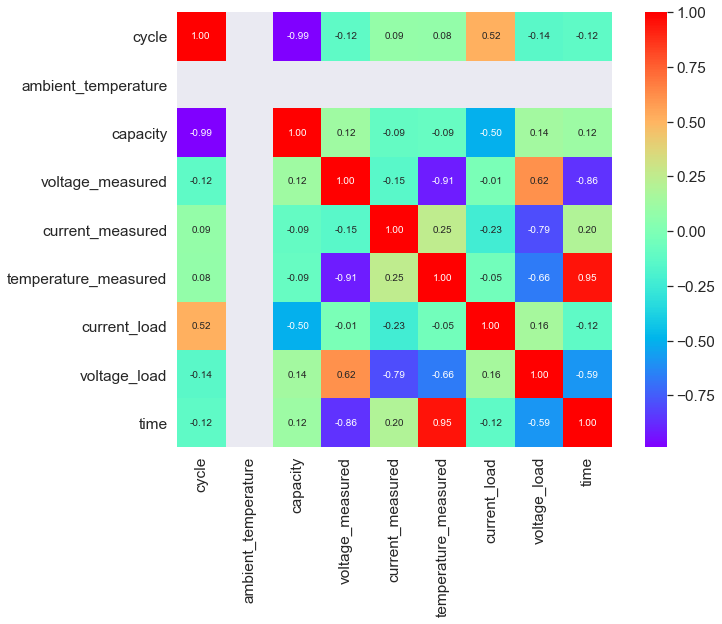

In [33]:
plt.figure(figsize=(12, 8))
k=9
cm = dataset.corr()
sns.set(font_scale=1.4)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 cmap="rainbow")
plt.show()

s:\anacondaprogramdata\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


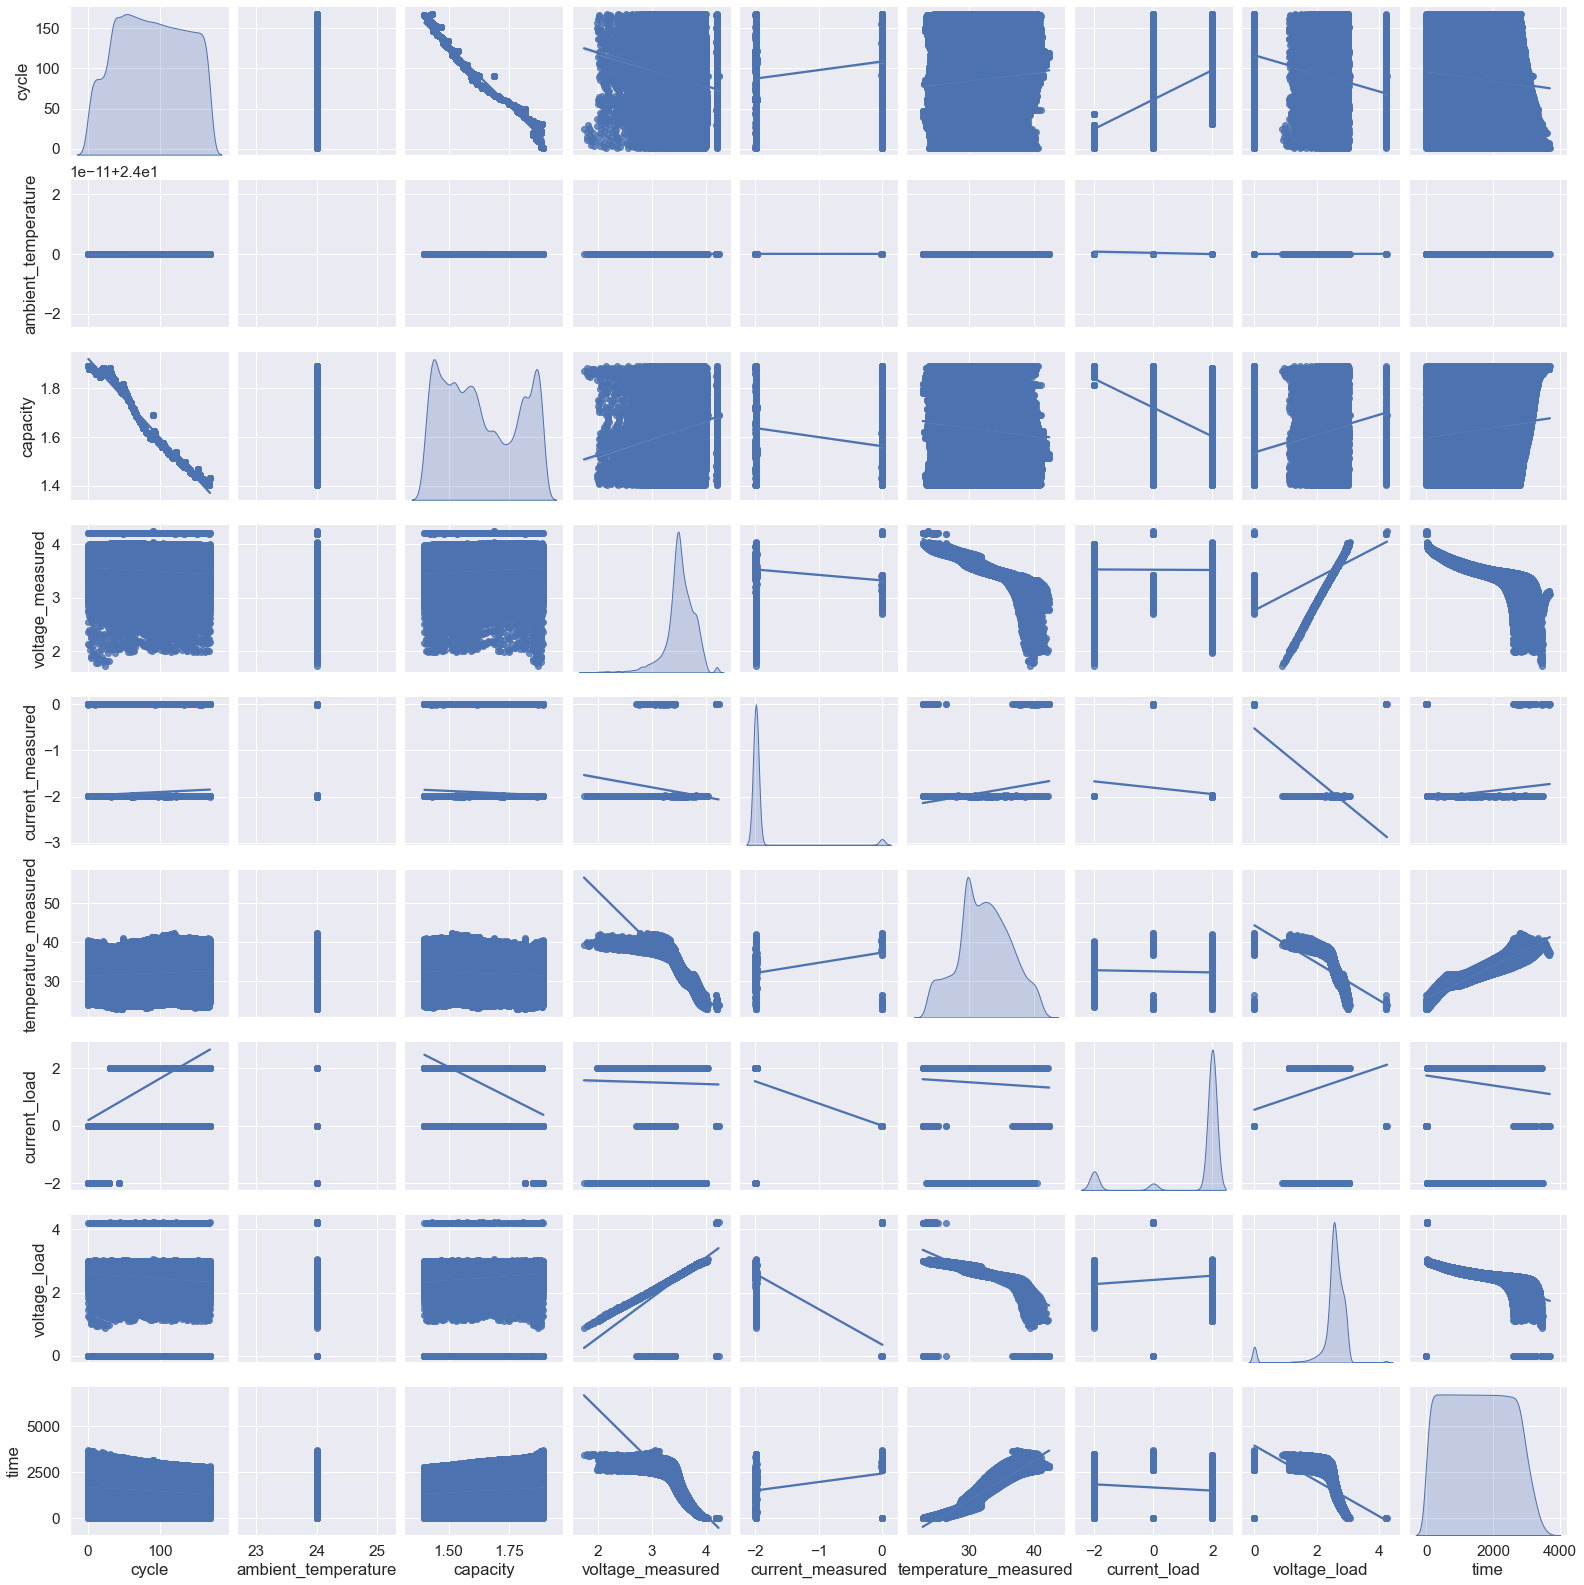

In [34]:
sns.pairplot(dataset, 
             diag_kind='kde', kind='reg')
plt.show()

Text(0.5, 1.0, 'Discharge B0005')

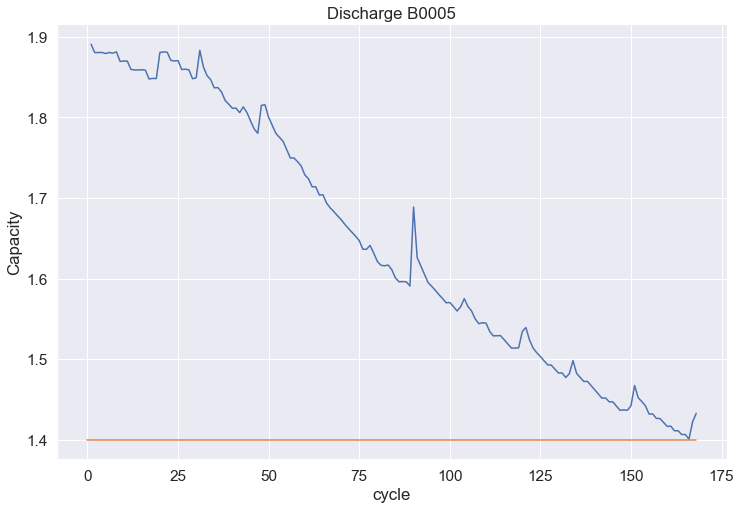

In [35]:
plot_df = capacity.loc[(capacity['cycle']>=1),['cycle','capacity']]
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(plot_df['cycle'], plot_df['capacity'])
plt.plot([0.,len(capacity)], [1.4, 1.4])
plt.ylabel('Capacity')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0005')

In [36]:
attrib=['cycle', 'datetime', 'capacity']

In [37]:
dis_ele = capacity[attrib]

In [38]:
C = dis_ele['capacity'][0]

In [39]:
for i in range(len(dis_ele)):
    dis_ele['SoH']=(dis_ele['capacity'])/C
print(dis_ele.head(5))

   cycle            datetime  capacity       SoH
0      1 2008-04-02 15:25:41  1.891052  1.000000
1      2 2008-04-02 19:43:48  1.880637  0.994492
2      3 2008-04-03 00:01:06  1.880663  0.994506
3      4 2008-04-03 04:16:37  1.880771  0.994563
4      5 2008-04-03 08:33:25  1.879451  0.993865


Text(0.5, 1.0, 'Discharge B0005')

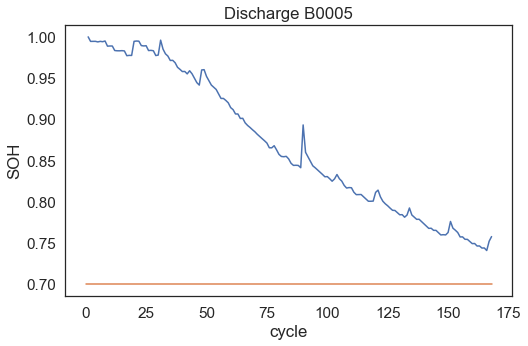

In [40]:
plot_df = dis_ele.loc[(dis_ele['cycle']>=1),['cycle','SoH']]
sns.set_style("white")
plt.figure(figsize=(8, 5))
plt.plot(plot_df['cycle'], plot_df['SoH'])
plt.plot([0.,len(capacity)], [0.70, 0.70])
plt.ylabel('SOH')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0005')

In [41]:
C = dataset['capacity'][0]

In [42]:
soh = []

In [43]:
for i in range(len(dataset)):
    soh.append([dataset['capacity'][i] / C])

In [44]:
soh = pd.DataFrame(data=soh, columns=['SoH'])

In [45]:
soh.head()

,SoH
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [46]:
soh.sample(10)

,SoH
50083,0.757491
49560,0.740569
42731,0.767623
3558,0.977434
28892,0.830119
25406,0.843872
13357,0.938805
28092,0.835500
46247,0.757055
26824,0.849084


In [47]:
attribs=['capacity', 'voltage_measured', 'current_measured',
         'temperature_measured', 'current_load', 'voltage_load']

In [48]:
X = dataset[attribs]

In [49]:
X

,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load
0,1.891052,4.199360,-0.001866,23.937044,-0.0004,0.000
1,1.891052,4.199497,-0.002139,23.924074,-0.0004,4.215
2,1.891052,3.985606,-1.988778,24.004257,-2.0000,3.003
3,1.891052,3.963247,-1.992558,24.162868,-2.0000,2.987
4,1.891052,3.946647,-1.988491,24.346368,-2.0000,2.972
...,...,...,...,...,...,...
50280,1.432455,3.336677,-0.002464,38.744012,0.0006,0.001
50281,1.432455,3.349952,-0.005358,38.462399,0.0006,0.001
50282,1.432455,3.362104,-0.003906,38.246805,0.0006,0.001
50283,1.432455,3.373357,-0.002763,37.970504,0.0006,0.001


In [50]:
X.shape

(50285, 6)

In [51]:
scaler = StandardScaler()

In [52]:
X_std = scaler.fit_transform(X)

In [53]:
X = pd.DataFrame(X_std, columns = X.columns)

In [54]:
X

,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load
0,1.689961,2.542992,4.931631,-2.106916,-1.137012,-4.537552
1,1.689961,2.543505,4.930924,-2.110155,-1.137012,3.115305
2,1.689961,1.747372,-0.200963,-2.090132,-2.681482,0.914769
3,1.689961,1.664148,-0.210727,-2.050523,-2.681482,0.885719
4,1.689961,1.602358,-0.200222,-2.004699,-2.681482,0.858484
...,...,...,...,...,...,...
50280,-1.312317,-0.668038,4.930086,1.590715,-1.136240,-4.535736
50281,-1.312317,-0.618625,4.922609,1.520390,-1.136240,-4.535736
50282,-1.312317,-0.573394,4.926361,1.466552,-1.136240,-4.535736
50283,-1.312317,-0.531507,4.929314,1.397553,-1.136240,-4.535736


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_std, soh, test_size=0.2, random_state=2301)

In [56]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40228, 6), (10057, 6), (40228, 1), (10057, 1))

In [57]:
pipeline = Pipeline(steps=[('impute', SimpleImputer(strategy='mean'))])

In [58]:
def prepare_model(algorithm, X_train, y_train): 
    model = Pipeline(steps=[('preprocessing', pipeline),('algorithm', algorithm)])
    model.fit(X_train, y_train)
    return model

In [59]:
algorithms = [RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(), 
              BaggingRegressor(), SVR(), DecisionTreeRegressor(), ExtraTreeRegressor(), 
              LinearRegression(), SGDRegressor(), KNeighborsRegressor()]

In [60]:
names = []
times = []
mse = []
rmse = []

In [61]:
for algorithm in algorithms:
    name = type(algorithm).__name__
    names.append(name)
    start_time = time.time()
    model = prepare_model(algorithm, X_train, y_train)
    pred = model.predict(X_test)
    end_time = time.time()
    times.append(end_time - start_time)
    mse.append(mean_squared_error(y_test, pred))
    rmse.append(np.sqrt(mean_squared_error(y_test, pred)))

s:\anacondaprogramdata\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
s:\anacondaprogramdata\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
s:\anacondaprogramdata\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
s:\anacondaprogramdata\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

In [62]:
print('Regression Results in Algorithms') 
results_dict = {'Algorithm': names, 'MSE': mse, 'RMSE': rmse, 'Time': times}
pd.DataFrame(results_dict).sort_values(by='RMSE', ascending=1)

Regression Results in Algorithms


,Algorithm,MSE,RMSE,Time
7,LinearRegression,3.730142e-32,1.931357e-16,0.103985
5,DecisionTreeRegressor,5.464334e-30,2.337592e-15,0.821001
6,ExtraTreeRegressor,6.028041e-30,2.455207e-15,0.172003
0,RandomForestRegressor,7.020456e-12,2.649614e-06,31.278843
3,BaggingRegressor,1.136833e-11,3.371695e-06,4.512003
8,SGDRegressor,9.388068e-11,9.689204e-06,0.271999
2,GradientBoostingRegressor,1.570172e-08,1.253065e-04,20.947731
9,KNeighborsRegressor,1.085739e-06,1.041988e-03,1.992521
1,AdaBoostRegressor,4.244260e-05,6.514798e-03,4.469796
4,SVR,3.682221e-03,6.068131e-02,0.689000


In [63]:
rfr = RandomForestRegressor(random_state=2301, n_estimators=100)

rfr.fit(X_train, y_train)
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

rfr_pred = rfr.predict(X_test)
rfr_rmse = np.sqrt(mean_squared_error(y_test, rfr_pred))
print(rfr_rmse)

C:\Users\kanna\AppData\Local\Temp\ipykernel_17140\2433410063.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


0.999999999707509
0.9999999989134766
2.6763758909390223e-06


<AxesSubplot:ylabel='SoH'>

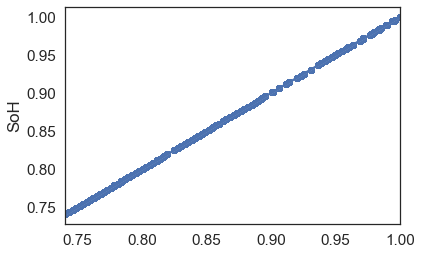

In [64]:
sns.regplot(x = rfr_pred, y = y_test)

In [68]:
train_dataset = dataset[attribs]

In [69]:
sc = MinMaxScaler(feature_range=(0,1))

In [70]:
train_dataset = sc.fit_transform(train_dataset)

In [71]:
print(train_dataset.shape)
print(soh.shape)

(50285, 6)
(50285, 1)


In [72]:
def create_model():
    model = Sequential()
    model.add(Dense(8, activation='relu', input_dim=train_dataset.shape[1]))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(rate=0.25))
    model.add(Dense(1))
    return model

In [73]:
model = create_model()

In [74]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 56        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.compile(optimizer=Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08), loss='mean_absolute_error')

In [76]:
model.fit(x=train_dataset, y=soh.to_numpy(), batch_size=25, epochs=50)

Epoch 1/50
2012/2012 [==============================] - 12s 5ms/step - loss: 0.1162
Epoch 2/50
2012/2012 [==============================] - 9s 5ms/step - loss: 0.0205
Epoch 3/50
2012/2012 [==============================] - 8s 4ms/step - loss: 0.0193
Epoch 4/50
2012/2012 [==============================] - 8s 4ms/step - loss: 0.0190
Epoch 5/50
2012/2012 [==============================] - 8s 4ms/step - loss: 0.0173
Epoch 6/50
2012/2012 [==============================] - 7s 4ms/step - loss: 0.0171
Epoch 7/50
2012/2012 [==============================] - 7s 4ms/step - loss: 0.0168
Epoch 8/50
2012/2012 [==============================] - 7s 3ms/step - loss: 0.0168
Epoch 9/50
2012/2012 [==============================] - 7s 4ms/step - loss: 0.0167
Epoch 10/50
2012/2012 [==============================] - 8s 4ms/step - loss: 0.0168
Epoch 11/50
2012/2012 [==============================] - 7s 4ms/step - loss: 0.0166
Epoch 12/50
2012/2012 [==============================] - 7s 4ms/step - loss: 0.0165


In [77]:
dataset_val, capacity_val = load_data('B0006')

Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 2.035337591005598, 4.179799607333447, -0.0023663271409738672, 24.277567510331888, -0.0006, 0.0, 0.0]


In [78]:
attrib=['cycle', 'datetime', 'capacity']

In [79]:
dis_ele = capacity_val[attrib]

In [80]:
C = dis_ele['capacity'][0]

In [81]:
for i in range(len(dis_ele)):
    dis_ele['SoH']=(dis_ele['capacity']) / C

In [82]:
print(dataset_val.head(5))
print(dis_ele.head(5))

   cycle  ambient_temperature            datetime  capacity  voltage_measured  \
0      1                   24 2008-04-02 15:25:41  2.035338          4.179800   
1      1                   24 2008-04-02 15:25:41  2.035338          4.179823   
2      1                   24 2008-04-02 15:25:41  2.035338          3.966528   
3      1                   24 2008-04-02 15:25:41  2.035338          3.945886   
4      1                   24 2008-04-02 15:25:41  2.035338          3.930354   

   current_measured  temperature_measured  current_load  voltage_load    time  
0         -0.002366             24.277568       -0.0006         0.000   0.000  
1          0.000434             24.277073       -0.0006         4.195  16.781  
2         -2.014242             24.366226       -1.9990         3.070  35.703  
3         -2.008730             24.515123       -1.9990         3.045  53.781  
4         -2.013381             24.676053       -1.9990         3.026  71.922  
   cycle            datetime  cap

In [85]:
attrib=['capacity', 'voltage_measured', 'current_measured',
        'temperature_measured', 'current_load', 'voltage_load']

In [86]:
soh_pred = model.predict(sc.fit_transform(dataset_val[attrib]))

1572/1572 [==============================] - 6s 3ms/step


In [87]:
print(soh_pred.shape)

(50285, 1)


In [88]:
C = dataset_val['capacity'][0]

In [89]:
soh = []

In [90]:
for i in range(len(dataset_val)):
    soh.append(dataset_val['capacity'][i] / C)

In [91]:
new_soh = dataset_val.loc[(dataset_val['cycle'] >= 1), ['cycle']]

In [92]:
new_soh['SoH'] =  soh

In [93]:
new_soh['NewSoH'] = soh_pred

In [94]:
new_soh = new_soh.groupby(['cycle']).mean().reset_index()

In [95]:
new_soh.sample(10)

,cycle,SoH,NewSoH
22,23,0.945419,0.967383
141,142,0.628499,0.794344
42,43,0.862106,0.918883
115,116,0.672251,0.814166
150,151,0.633706,0.796709
104,105,0.703351,0.828243
68,69,0.756962,0.854997
12,13,0.944944,0.966759
50,51,0.857224,0.914599
48,49,0.888368,0.932829


In [96]:
rms = np.sqrt(mean_squared_error(new_soh['SoH'], new_soh['NewSoH']))
print('Root Mean Square Error: ', rms)

Root Mean Square Error:  0.11722458998285062


Text(0.5, 1.0, 'Discharge B0006')

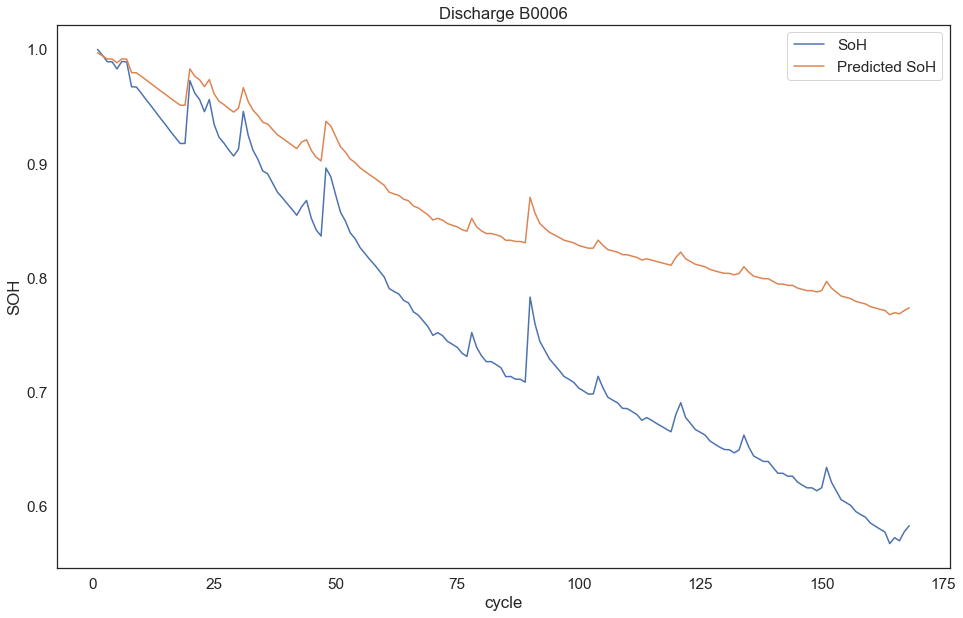

In [97]:
plot_df = new_soh.loc[(new_soh['cycle']>=1),['cycle','SoH', 'NewSoH']]
sns.set_style("white")
plt.figure(figsize=(16, 10))
plt.plot(plot_df['cycle'], plot_df['SoH'], label='SoH')
plt.plot(plot_df['cycle'], plot_df['NewSoH'], label='Predicted SoH')
plt.ylabel('SOH')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.legend()
plt.title('Discharge B0006')

In [98]:
dataset_val, capacity_val = load_data('B0005')

Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 1.8564874208181574, 4.191491807505295, -0.004901589207462691, 24.330033885570543, -0.0006, 0.0, 0.0]


In [99]:
attrib=['cycle', 'datetime', 'capacity']

In [100]:
dis_ele = capacity_val[attrib]

In [101]:
rows=['cycle','capacity']

In [102]:
dataset=dis_ele[rows]

In [103]:
data_train=dataset[(dataset['cycle']<50)]

In [104]:
data_set_train=data_train.iloc[:,1:2].values

In [105]:
data_test=dataset[(dataset['cycle']>=50)]

In [106]:
data_set_test=data_test.iloc[:,1:2].values

In [107]:
sc=MinMaxScaler(feature_range=(0,1))

In [108]:
data_set_train=sc.fit_transform(data_set_train)

In [109]:
data_set_test=sc.transform(data_set_test)

In [110]:
X_train=[]
y_train=[]

In [111]:
for i in range(10,49):
    X_train.append(data_set_train[i-10:i,0])
    y_train.append(data_set_train[i,0])

In [112]:
X_train,y_train=np.array(X_train),np.array(y_train)

In [113]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [114]:
def create_lstm_model():
    regress = Sequential()
    regress.add(LSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1],1)))
    regress.add(Dropout(0.3))
    regress.add(LSTM(units=200, return_sequences=True))
    regress.add(Dropout(0.3))
    regress.add(LSTM(units=200, return_sequences=True))
    regress.add(Dropout(0.3))
    regress.add(LSTM(units=200))
    regress.add(Dropout(0.3))
    regress.add(Dense(units=1))
    return regress
   

In [115]:
regress = create_lstm_model()

In [116]:
regress.compile(optimizer='adam',loss='mean_squared_error')

In [117]:
regress.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 200)           161600    
                                                                 
 dropout_1 (Dropout)         (None, 10, 200)           0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 200)           320800    
                                                                 
 dropout_2 (Dropout)         (None, 10, 200)           0         
                                                                 
 lstm_2 (LSTM)               (None, 10, 200)           320800    
                                                                 
 dropout_3 (Dropout)         (None, 10, 200)           0         
                                                                 
 lstm_3 (LSTM)               (None, 200)              

In [ ]:
regress.fit(X_train,y_train,epochs=200,batch_size=25)

Epoch 1/200


In [ ]:
print(len(data_test))

In [ ]:
data_total=pd.concat((data_train['capacity'], data_test['capacity']),axis=0)

In [ ]:
inputs=data_total[len(data_total)-len(data_test)-10:].values

In [ ]:
inputs=inputs.reshape(-1,1)

In [ ]:
inputs=sc.transform(inputs)

In [ ]:
X_test=[]

In [ ]:
for i in range(10,129):
    X_test.append(inputs[i-10:i,0])

In [ ]:
X_test=np.array(X_test)

In [ ]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [ ]:
pred=regress.predict(X_test)

In [ ]:
print(pred.shape)

In [ ]:
pred=sc.inverse_transform(pred)

In [ ]:
pred=pred[:,0]

In [ ]:
tests=data_test.iloc[:,1:2]

In [ ]:
rmse = np.sqrt(mean_squared_error(tests, pred))

In [ ]:
print('Test RMSE: %.3f' % rmse)

In [ ]:
metrics.r2_score(tests,pred)

In [ ]:
ln = len(data_train)

In [ ]:
data_test['pre']=pred

In [ ]:
plot_df = dataset.loc[(dataset['cycle']>=1),['cycle','capacity']]

In [ ]:
plot_per = data_test.loc[(data_test['cycle']>=ln),['cycle','pre']]

In [ ]:
plt.figure(figsize=(16, 10))
plt.plot(plot_df['cycle'], plot_df['capacity'], label="Actual data", color='blue')
plt.plot([0.,168], [1.38, 1.38],dashes=[6, 2], label="treshold")
plt.ylabel('Capacity')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.legend()
plt.title('Discharge B0005 (prediction) start in cycle 50 -RULe=-8, window-size=10')

In [ ]:
pred=0
Afil=0
Pfil=0

In [ ]:
a=data_test['capacity'].values
b=data_test['pre'].values

In [ ]:
j=0
k=0

In [ ]:
for i in range(len(a)):
    actual=a[i]
    
    if actual<=1.38:
        j=i
        Afil=j
        break

In [ ]:
for i in range(len(a)):
    pred=b[i]
    if pred< 1.38:
        k=i
        Pfil=k
        break

In [ ]:
print("The Actual fail at cycle number: "+ str(Afil+ln))
print("The prediction fail at cycle number: "+ str(Pfil+ln))
RULerror=Pfil-Afil
print("The error of RUL= "+ str(RULerror)+ " Cycle(s)")